# The different faces of Python

## Readable Syntax - Quicksort in Python

Python code very often looks very similar to Pseudo code. Here an example of the [Quicksort-algorithm](https://en.wikipedia.org/wiki/Quicksort).

### Quicksort Pseudocode from Wikipedia

### Here the Python implementation

In [ ]:
import random

# A python implementation of the Wikipedia quicksort algorithm
def my_quicksort(array):
    if len(array) <= 1:
        return array
    
    pivot = array[0] # select a pivot (first element of list)
    rest = array[1:] # the array with the pivot
                     # removed
    less = [x for x in rest if x <= pivot]
    greater = [x for x in rest if x > pivot]
    
    return my_quicksort(less) + [pivot] + my_quicksort(greater)

testarr = [random.randint(-1000, 1000) for i in range(30)]
print(testarr)
print(my_quicksort(testarr))

## Interactive possibilities - Munich temperatures
In the following, we show a simple interactive work-flow with `Python`. We do a quick look at a simple two-column data file. We plot it and reject invalid data. The two columns in the file [munich_temperatures.txt](data/munich_temperatures.txt) have the following meaning:
1. A date; the fractional part gives the day within the year. For instance, the first of January is given as `1 / 365 =  0.00274`. Leap year issues are neglected.
2. The mean temperature at that date in the city of Munich / Germany

In the following cell we issue a `Unix`-command. This can be done with the syntay `!command`.

In [ ]:
# list the contents of the file 'data/munich_temperatures.txt'
# with the Unix cat command
!cat data/munich_temperatures.txt

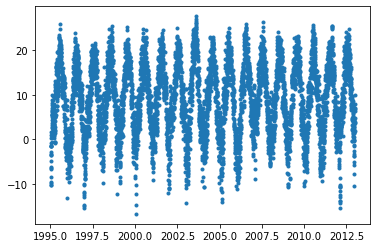

In [5]:
# playing around with the data interactively

# The following line is necessary to show matplotlib
# plots within this notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("data/munich_temperatures.txt")
day = data[:,0]
temp = data[:,1]

day = day[(temp < 60) & (temp > -60)]
temp = temp[(temp < 60) & (temp > -60)]

# uncomment the following two lines to get rid of obviously bad data
#day = day[(temp < 50) & (temp > -50)]
#temp = temp[(temp < 50) & (temp > -50)]

plt.plot(day, temp, '.')

## Interactive possibilities - load code from disk or WWW

You can load `Python`-code from disk or from the Web dirctly into a notebook cell.

In [ ]:
%load code/temperature.py

In [ ]:
%load https://matplotlib.org/mpl_examples/lines_bars_and_markers/barh_demo.py

## Capabilities for symbolic mathematics (sympy-module)

The Python `sympy`-module has symbolic mathematic capabilities similar to Maple or Mathematica.

In [6]:
import sympy as sp

sp.init_printing()

# declare symbolic variables and functions:
x, y, z, t = sp.symbols('x y z t')
f = sp.Function('f')

Nicely write down an Integral

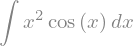

In [8]:
sp.Integral(x**2 * sp.cos(x), x)

solve the integral symbolically

In [10]:
sp.Integral(x**2 * sp.cos(x), x).doit()

solve a differential equation

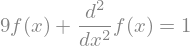

In [11]:
sp.Eq(sp.Derivative(f(x),x,x) + 9*f(x), 1)

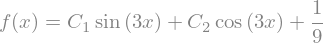

In [12]:
sp.dsolve(sp.Eq(sp.Derivative(f(x),x,x) + 9*f(x), 1), f(x))

calculate symbolically the inverse of a matrix

In [ ]:
A = sp.Matrix(2, 2, [x, y, z, t])
A

In [ ]:
A.inv()

show the first 50 digits of $\pi$.

In [ ]:
sp.pi.evalf(50)

## Python is not slow - use vector operations

**The C/Fortran paradigm to manipulate arrays by visiting each element is wrong in Python nearly always!**

In [13]:
import numpy as np

x = np.linspace(0.0, 2.0 * np.pi, 100)
print(x)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

In [14]:
%%timeit
import numpy as np

# C-like element-wise array manipulation
x = np.linspace(0.0, 2.0 * np.pi, 100)
y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = np.sin(x[i])

123 µs ± 235 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Manipulating arrays by vector operations is typically a factor of 10 faster than the *visit each element* strategy!

In [15]:
%%timeit
import numpy as np

# fast vector operations
x = np.linspace(0.0, 2.0 * np.pi, 100)
y = np.sin(x)

22.3 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Embedding Web elements
You can embed Web-elements directly into a Jupyter-Notebook

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo("VteSyQzRSyQ")